# Tutorial - Reinforcement Learning

This is a guide to the code present in the DDPG / TD3 / DDPG_same_structure folders.
The (almost entirety of the) code was originally written by Maria Grazia Berni, who has gracefully allowed us to use it for today's demonstration. 
Her original repository can be found at ```https://github.com/mariagraziaberni/Reinforcement_Learning```.

All errors, typos and the general ugliness of it all rest entirely on me, Emanuele Panizon.


# Schema of repo

The structure of the repos is similar, and is as such:

Everything concerning the algorithm is contained by an overarching (TD3 or DDPG) **Agent** class - in ```main_classes.py``` - which contains:
- The **environment** class (directly from gymasium).
- A **Replay Buffer** class, to store the past experiences.
- **Actor** and **Critic** networks (as many as required by the algorithm!).

Experience is collected at the higher level in the ```main.py```, which loops over the requested episodes acting following the (noisy) policy given by the **actor**.

## The environment

In [1]:
import gymnasium as gym
from time import sleep
import numpy as np

In [2]:
env = gym.make('BipedalWalker-v3', render_mode="human")

i = 0
terminated = False
truncated = False
action = [0,0,0,0.]

env.reset()

while not(truncated or terminated):
    i += 1
    results = env.step(action)
    new_state, reward, terminated, truncated, info = results
    cos = np.sin(2*np.pi*i/10)
    action = [cos, cos, -cos, -cos] 
    print("\n", new_state, reward, terminated, truncated, info)


## Rendering it in a gif

Let us check a (very dumb) policy for our bipedal walker.

In [48]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation

In [59]:
env = gym.make('BipedalWalker-v3', render_mode="rgb_array")
env.reset()
fig, ax = plt.subplots()
ax.axis('off')
i = 0
terminated = False
truncated = False
action = [0,0,0,0.]

img = ax.imshow( env.render())
imgs = [[img]]

while not(truncated or terminated):
    
    i += 1
    img = ax.imshow( env.render(),animated=True)
    imgs.append([img])
    
    results = env.step(action)
    new_state, reward, terminated, truncated, info = results
    cos = np.sin(2*np.pi*i/10)
    action = [cos, cos, -cos, -cos]
plt.close()
my_anim = animation.ArtistAnimation(fig, imgs, interval=100)
my_anim.save('finedumondu.gif')


MovieWriter ffmpeg unavailable; using Pillow instead.


## See the movie 

The previous cell saves the individual frames into a git, ```finedumondu.gif```, which can be loaded into the markdown with the following line ```![SegmentLocal](finedumondu.gif "gif")```:

![SegmentLocal](finedumondu.gif "gif")

# Let us check the single iteration.

In [60]:
# from: https://gymnasium.farama.org/environments/box2d/bipedal_walker/
# State consists of hull angle speed, angular velocity, horizontal speed, vertical speed, 
# position of joints and joints angular speed, legs contact with ground, 
# and 10 lidar rangefinder measurements. 
# There are no coordinates in the state vector.

env = gym.make('BipedalWalker-v3', render_mode="rgb_array")

initial_state, _ = env.reset()

action = [0.1,-0.1,0.05, -0.2]
new_state, reward, terminated, truncated, info = env.step(action)

print("hull angle speed, angular velocity, horizontal speed, vertical speed: \n\t", new_state[:4] ) 
print("position of joints and joints angular speed, legs contact with ground: \n\t", new_state[4:-10] ) 
print("lidar rangefinder measurements: \n\t", new_state[-10:] ) 

hull angle speed, angular velocity, horizontal speed, vertical speed: 
	 [-0.00963074 -0.00881186 -0.01879779 -0.01117899]
position of joints and joints angular speed, legs contact with ground: 
	 [ 0.46141255  0.6865455   0.07626402 -0.8051622   1.          0.36334372
  0.7592743   0.07956165 -1.0030869   1.        ]
lidar rangefinder measurements: 
	 [0.44670308 0.45177606 0.46758717 0.49609032 0.5412381  0.61050963
 0.71862274 0.8977674  1.         1.        ]


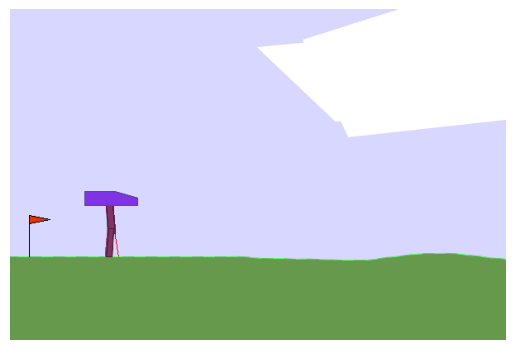

In [62]:
env = gym.make('BipedalWalker-v3', render_mode="rgb_array")
plt.axis('off')
initial_state, _ = env.reset()
plt.imshow(env.render())
action = [0.1,-0.1,0.05, -0.2]
new_state, reward, terminated, truncated, info = env.step(action)


# How to run the code

The code is contained in the three folders: DDPG, TD3 and DDPG_same_structure.
DDPG and DDPG_same_structure use the same algorithm, but differ in architecture of the NN. DDPG_same_structure employs NNs of identical shape than the TD3 algorithm.


## Run the DDPG_same_structure algorithm.

We can run the DDPG with fixed NN architecture directly from the notebook via the command ```! python ./DDPG_same_structure/main.py lr_critic lr_actor save_folder noise_type n_episodes```.
Every 50 episodes there will be a check of the average score of the previous trajectories. Each time the score increases, the parameters of the networks will be saved.

In [24]:
! python ./DDPG_same_structure/main.py 0.00001 0.0001 DDPG_same_structure/results/trial 0 3000

device is:  cuda
episode  0 score -3.4 average score -3.4
saving
saving
saving
saving
episode  50 score -17.9 average score -16.4


## Run the DDPG algorithm.

We can run the DDPG directly from the notebook via the command ```! python ./DDPG/main.py lr_critic lr_actor save_folder noise_type n_episodes```.
The list containing the actual structure of the NNs can be directly altered in the ```./DDPG/main.py``` file. (Feel free to make this less ugly!).
Every 50 episodes there will be a check of the average score of the previous trajectories. Each time the score increases, the parameters of the networks will be saved.

In [ ]:
! python ./DDPG_same_structure/main.py 0.00001 0.0001 DDPG_same_structure/results/trial 0 3000

## Run the TD3 algorithm.

We can run the TD3 directly from the notebook via the command ```! python3 ./TD3/main.py arg1 arg2 arg3```, where:

- arg1 = critic learning rate
- arg2 = actor learning rate
- arg3 = directory to save plots and data of the rewards during the learning procedure, and to save the weights of the neural networks used to implement actor, critic1, critic2 and their target networks.

Every 50 episodes there will be a check of the average score of the previous trajectories. Each time the score increases, the parameters of the networks will be saved.

There is also a  ```test.py``` program, to be called using ```! python test.py arg1 arg2 arg3``` where 
- arg1 = directory where the networks parameters to load the model are saved
- arg2 = integer number of episodes
- arg3 = 0 to disable the graphic rendering, 1 or any other integer to enable it```.

This latter program allows to test the efficiency of the learned policies, and visualize them. Note: the graphical rendering of the episodes may not work remotely. In that case refer to the previous example for visualizing the episodes.

In [ ]:
! python3 ./TD3/main.py 0.001 0.001 TD3/results/trial

# Understanding the code
## Note: From now on, cells are intended as visual aid, not to be run in the notebook! 

## How to store the trajectories

A memory buffer is constructed, to allow for (reasonably) uncorrelated datapoints.
The $(s, a, r, s', done)$ tuples are put in the buffer sequentially, via the  ```store_transitions``` function.

When retrieved to perform parameters updates, they are randomized in batches via the  ```sample_buffer``` function.

In [21]:
# see TD3/main_classes2.py or DPPG/main_classes.py
class ReplayBuffer(): 

    def __init__(self, max_size, input_shape, n_actions): 
        
        self.mem_size = max_size 
        self.mem_cntr = 0 
        
        self.state_memory = np.zeros((self.mem_size, *input_shape))
        self.new_state_memory = np.zeros((self.mem_size, *input_shape)) 
        self.action_memory = np.zeros((self.mem_size, n_actions)) 
        self.reward_memory = np.zeros(self.mem_size) 
        self.terminal_memory = np.zeros(self.mem_size, dtype = bool)

    # IN
    def store_transition(self, state, action, reward, state_, done): 
        
        index = self.mem_cntr%self.mem_size 
        self.state_memory[index] = state
        self.new_state_memory[index] = state_ 
        self.terminal_memory[index] = done 
        self.reward_memory[index] = reward 
        self.action_memory[index] = action 
        self.mem_cntr +=1 

    # OUT
    def sample_buffer(self, batch_size): 
        
        max_mem = min(self.mem_cntr, self.mem_size) 
        batch = np.random.choice(max_mem, batch_size) 
        states = self.state_memory[batch] 
        states_ = self.new_state_memory[batch] 
        actions = self.action_memory[batch]
        rewards = self.reward_memory[batch] 
        dones = self.terminal_memory[batch] 
        return states, actions, rewards, states_, dones 

Exploration, i.e. collecting trajectories is done in the ```main.py```. 
At its core is nothing more than a loop where the action is called from the agent and the last visited tuple is stored in memory.

In [ ]:
#[...]

for i in range(EPISODES): 
    
        state, _ = env.reset() 
        done = False 
        score = 0 
        while not done: 
        
            action = agent.choose_action(state, expl_noise) 
            new_state, reward, term, trunc, _ = env.step(action) 
            done = (term or trunc)

            if reward <= -100: 
                reward =-1 
                agent.store_transition(state, action, reward, new_state, True) 
            else: 
                agent.store_transition(state, action, reward, new_state, False) 
                
            score += reward 
            state = new_state 

[...]

# Actor- and Critic- Networks

The TD3 and DDPG_same_structure networks share the same architecture for the NNs, as in the original literature.

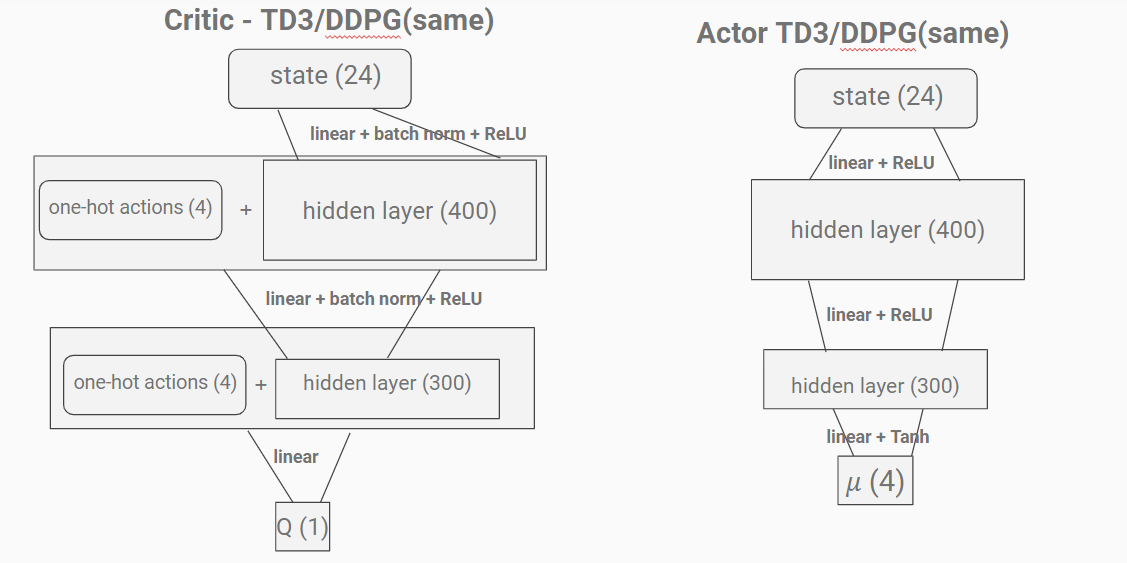


In [22]:
# from the main_classes.py file

class CriticNetwork(nn.Module): 
        
    def __init__(self, input_dims, fc1_dims, fc2_dims, n_actions, name= None, chkpt_dir = "save_m_2"): 
        super(CriticNetwork, self).__init__ ()
        
        self.name = name
        if name is not None: 
            if not os.path.exists(chkpt_dir): 
                os.makedirs(chkpt_dir) 
            self.checkpoint_file= os.path.join(chkpt_dir,name +'_td3') 
        
        
        self.input_dims = input_dims
        self.fc1_dims = fc1_dims 
        self.fc2_dims = fc2_dims 
        self.n_actions = n_actions 
        self.name = name 

        # The structure of the NN here is fixed, and has the actions as inputs both in the zeroth and first layer!
        self.fc1 = nn.Linear(self.input_dims[0] + n_actions, self.fc1_dims) 
        self.fc2 = nn.Linear(self.fc1_dims      + n_actions, self.fc2_dims)
        
        #scalar value of the critic (state-action value)
        self.q1 = nn.Linear(self.fc2_dims,1) 
        
    def forward(self, state, action): 
        """
        Calculates q(s,a)
        """
        q1_action_value = self.fc1(T.cat([state,action],dim=1))
        q1_action_value = F.relu(q1_action_value) 
        q1_action_value = self.fc2(T.cat([q1_action_value,action],dim=1))
        q1_action_value = F.relu(q1_action_value) 
        q1 = self.q1(q1_action_value) 
        return q1 

# [...]

NameError: name 'nn' is not defined

In the DPPG folder, however, you can find that the **Actor** and **Critic** classes accept a list of dimensions for the hidden layers. You can experiment with the size of these NNs to see whether deeper or larger (or smaller!) networks help with the training.

In [ ]:
# From DDPG/main_classes.py

class Critic(nn.Module): 
    
    def __init__(self, input_dim, hidden_layers_dims, n_actions, name=None, chkpt="model"): 
        
        super(Critic, self).__init__() 
        
        # hidden_layers_dims is a list with dimension of all hidden layers.
        # number of hidden_layers is inferred by its length
        self.hidden_layers_dims = list(input_dim) + hidden_layers_dims
        self.n_actions = n_actions 
        
        # name of model to save
        if name is not None:
            if not os.path.exists(chkpt): 
                os.makedirs(chkpt)
            self.filename = os.path.join(chkpt, name +'_ddpg')

        # hidden_layers are linear + layernorm. 
        self.hidden_layers_list = []
        for dim_in, dim_out in zip(self.hidden_layers_dims[:-1],self.hidden_layers_dims[1:]): 
            self.hidden_layers_list.append( nn.Linear( dim_in, dim_out) )
            self.hidden_layers_list.append( nn.LayerNorm(dim_out) )
            self.hidden_layers_list.append( nn.ReLU() )

        last_hidden_layer_dim = self.hidden_layers_dims[-1]
        self.hidden_layers_state_value = nn.Sequential(*self.hidden_layers_list)
        
        # a linear layer is constructed from the actions directly to the last hidden layer 
        self.action_value = nn.Linear(self.n_actions, last_hidden_layer_dim)
                                      
        # this is the final layer which returns the quality function q(s,a)
        self.q = nn.Linear(last_hidden_layer_dim,1)
        
    def forward(self, state, action): 
        
        # first "branch" from input state to final hidden layer
        state_value = self.hidden_layers_state_value(state)
        
        # second "branch" from action to final hidden layer
        action_value = F.relu(self.action_value(action))

        # merge of the two branches
        state_action_value = F.relu(torch.add(state_value, action_value))
        
        # evaluation of q(s,a)
        state_action_value = self.q(state_action_value)
        return state_action_value 

# [...]

## Where is the learning done?

Learning is done at the level of the **Agent** class. 
Remember that the critic/actors networks actually separate into two different types.

Those called ```actor```,  ```critic``` ```critic_1``` etc. etc. learn by *gradient descent*, following the deterministic policy gradient (for the actors) and the temporal difference error (for the critics).

Those called ```target_actor```, ,  ```target_critic``` ```target_critic_1``` etc. etc. do not learn. Instead, their parameters are (slowly) updated in time to follow those of the learning networks. Think of them as being constantly under the effect of ```torch.no_grad()``` for all purpouses.

For those which "actively learn", the **agent** contains optimizers which "see" the parameters of the different actor/critic networks. See for example ```TD3/main_classes2.py```:

In [ ]:
class Agent: 
    
    def __init__(self,
                 env, 
                 critic_lr = 0.001,
                 actor_lr = 0.001, 
                 tau = 0.005, 
                 gamma = 0.99, 
                 update_actor_interval = 2, 
                 warmup = 1000,
                 max_size = 1000000, 
                 layer1_size= 400, 
                 layer2_size= 300, 
                 batch_size = 100, 
                 noise = 0.2,
                 chkpt_dir = "model"):

        # [...]

        # One actor NN
        self.actor = ActorNetwork(self.input_dims, layer1_size, layer2_size, self.n_actions, name = "actor",chkpt_dir=chkpt_dir).to(self.device)

        # Two twin critics!
        self.critic_1 = CriticNetwork(self.input_dims, layer1_size, layer2_size, self.n_actions, name = "critic_1",chkpt_dir=chkpt_dir).to(self.device)
        self.critic_2 = CriticNetwork(self.input_dims, layer1_size, layer2_size, self.n_actions, name = "critic_2",chkpt_dir=chkpt_dir).to(self.device)

        # [...]


        # HERE ARE THE OPTIMIZERS FOR THE NON-TARGET NETWORKS
        # Only the "true" actor and twin critics learn via gradient methods, the targets have a soft update of parameters
        self.actor_optimizer = optim.Adam(self.actor.parameters(),lr = actor_lr) 
        self.critic_1_optimizer = optim.Adam(self.critic_1.parameters(),lr = critic_lr) 
        self.critic_2_optimizer = optim.Adam(self.critic_2.parameters(),lr = critic_lr) 


        # [...]

Since the **actor** (critic) network is an attribute of the **agent** class, ```self.actor.parameters()``` refers to the correct parameters.
The gradient is calculated in the ```train``` functions, which construct the correct losses from batch of (re)sampled experience from the memory buffer.

# Train in the DPPG

In the DPPG, the **critic** is trained to minimize the MSE error between its previous prediction ```Q1 = self.critic.forward(state,action)``` and new estimate ```target``` computed from the target critic following the pseudo-code:

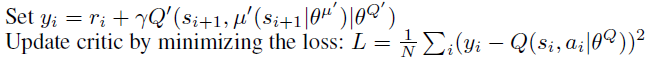

In [ ]:
# compute mu' using the *target* actor in the next states
target_actions = self.target_actor.forward(next_states)
# compute the *target* value using next states and target actions.
target_critic_value = self.target_critic(next_states, target_actions) 

# compute the new estimate Q^exp = r + gamma Q(s',a')
targets = rewards + self.gamma*not_done*target_critic_value
targets.to(self.device)          

self.critic.train()
self.critic_optimizer.zero_grad()
critic_value = self.critic.forward(states, actions)

# by default: self.critic_criterion = MSE 
# loss = (r + gamma Q(s', a') - Q(s,a))^2
loss = self.critic_criterion(critic_value, targets)
loss.backward() 

The update for the agent is actually simpler, and it is given by the deterministic policy gradient:
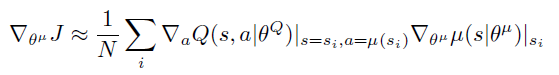

In [ ]:
# calculate deterministic action in states.
mu = self.actor.forward(states)

# gradient is performed directly on the Q(s,mu)
# Use minus to perform gradient ASCENT instead of DESCENT.

actor_loss = -self.critic.forward(states,mu)
actor_loss = torch.mean(actor_loss)
actor_loss.backward()
self.actor_optimizer.step()

# Train in the TD3

In the TD3, each **critic** is trained to minimize the MSE error between its previous prediction ```Q1 = self.critic_1.forward(state,action)``` and new estimate ```target```. Following the pseudo-code:

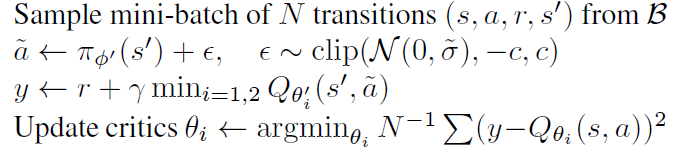


In [2]:
# See lines 231-252 in TD3/main_classes.p
[]

# target action a' = \pi_{phi'}(s') 
target_actions = self.target_actor.forward(state_) 

# noise is introduced by \tilde{a} = clip(noise + a', -c, c)
noise = T.clamp(T.randn_like(action)*self.noise*self.max_action,0.5*self.min_action,0.5*self.max_action)
target_actions = target_actions + noise
target_actions = T.clamp(target_actions, self.min_action, self.max_action) 

# both critics are evaluated in the new state and for the new (noisy) target actions 
Q_tc1 = self.target_critic_1.forward(state_,target_actions) 
Q_tc2 = self.target_critic_2.forward(state_,target_actions) 

Q1 = self.critic_1.forward(state,action) 
Q2 = self.critic_2.forward(state,action) 

# The value of a terminal state is always zero!
Q_tc1[done] = 0.0 
Q_tc2[done] = 0.0 

Q_tc1= Q_tc1.view(-1) 
Q_tc2 = Q_tc2.view(-1) 

# target is computed as the minimum to avoid maximization bias
critic_target_value = T.min(Q_tc1,Q_tc2) 

target = reward +self.gamma*critic_target_value
target = target.view(self.batch_size,1) 

# [...]

# Actual training with MSE error
self.critic_1_optimizer.zero_grad() 
self.critic_2_optimizer.zero_grad() 

q1_loss = F.mse_loss(Q1,target) 
q2_loss = F.mse_loss(Q2,target) 

critic_loss = q1_loss + q2_loss 
critic_loss.backward() 

NameError: name 'self' is not defined

The actor network update is simpler: 

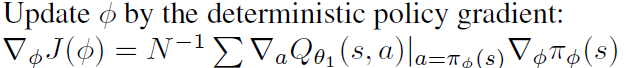

In [ ]:
self.actor_optimizer.zero_grad() 

# calculate Q(s,a)
actor_q1_loss = self.critic_1.forward(state, self.actor.forward(state))
# Use minus to perform gradient ASCENT instead of DESCENT.
actor_loss = -T.mean(actor_q1_loss) 
# calculate \grad Q(s,a)
actor_loss.backward() 

# Soft updates for the targets
On the other hand, *target* networks do not use gradient ascent/descent, but instead use parameter soft-updates. These updates are done manually via the function ```update_network_parameters``` of the **Agent** class. See for example the update for the ```critic_1``` for the TD3 **Agent**.

In [ ]:
def update_network_parameters(self, tau = None): 
    
        # [...]        
        critic_1_params = self.critic_1.named_parameters()
        # [...]
        target_critic_1_params = self.target_critic_1.named_parameters()
        
        # [...]
        critic_1 = dict(critic_1_params)
        # [...]
        target_critic_1 = dict(target_critic_1_params)
        
        # [...]        
        
        for name in critic_1:
            critic_1[name] = tau*critic_1[name].clone()+ \
                                      (1-tau)*target_critic_1[name].clone()

        self.target_critic_1.load_state_dict(critic_1)
        # [...]